# Analysis of satellite images of the Arctic Ocean.

## Introduction

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to 2019). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2019 with the exception of 2012. This a small subset of the complete satellite data set, with only two ice maps every month (some are missing though), all the data were downloaded from [here](https://seaice.uni-bremen.de/start/data-archive/).

There is an ice-map for each first and each 15th of a month from the years 2003-2011 and 2013-2019. For instance, the file `20080415.npy` represents data for the 15th of April 2008. The primary goal of this project is to utilize satellite images to check whether there has been a decrease in the concentration of ice in the Arctic Ocean in recent years.

### Importing necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob

### Getting familiar with the data and plotting two maps, one in January and the other in August. One can see that the ice concentration drops in the summer which is normal. 

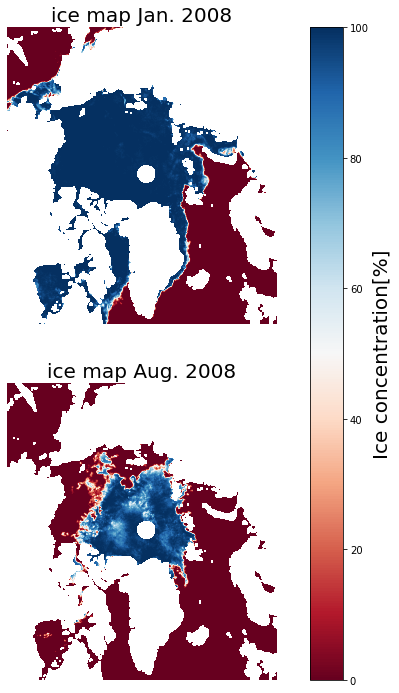

In [2]:
Jan_map = np.load('./ice_data/20080115.npy')
Aug_map = np.load('./ice_data/20080815.npy')
fig,axs = plt.subplots(2, figsize = (12,12))
pos1 = axs[0].imshow(Jan_map, cmap = "RdBu", origin = "lower")
pos2 = axs[1].imshow(Aug_map, cmap = "RdBu", origin = "lower")
axs[0].set_title("ice map Jan. 2008", fontsize = 20)
axs[1].set_title("ice map Aug. 2008", fontsize = 20)
axs[0].axis("off")
axs[1].axis("off")
cbar = plt.colorbar(pos1, ax = axs)
cbar.set_label("Ice concentration[%]", fontsize = 20)

We now want to make a plot of the ice concentration over time. Since we have more than 350 maps, we do not want to read them all in individually by hand. We Write a loop over all the available files, and inside the loop, we read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``) from the filename. Then, also inside the loop, construct an array ``times`` which is essentially the fractional time in years.

We assume for simplicity that each month has 30 days and each year has 360 days - this will not affect the results later. As an example, in the year 2003, you would put the 1st of January as $2003.00$, the 2nd of January as $2003 + \frac{1}{360}\approx 2003.033$ and the 1st of February as $2003 + \frac{1}{12}\approx 2003.083$ into the `times`-array. Finally, we also compute for each file the total number of pixels that have a value above 50% ice. We put also those values into an array. After the loop, make a plot of the number of pixels with a concentration above 50% against time. Then compute the area where the ice concentration is above a given threshold. The areas (in km$^{2}$) are contained inside the file named ``ice_data_area.npy``. We loop over the files and for each file, we compute the total area where the concentration of ice is 99% or above. We then make a new plot showing the area of >99% ice concentration against time. Also plot the *total area* covered by ice as a function of time. Based on the results we obtain we should be able to answer the question: how does the minimum value within each year change over time? 







Beginning with importing all files from the folder 'ice_data' using glob module, and then looping over all files and extracting years, months and days from filesnames as follows:

In [3]:
l = glob.glob("./ice_data/*.npy")
area = np.load('./ice_data_area.npy')

In [4]:
#assigning some variables for the sake of the loop: 
times=np.zeros(378)
pixels=np.zeros(378)  
areas_99=np.zeros(379)
areas_100 = np.zeros(378)

In [5]:
# looping over all files
j = 0
for file in l: 
    data = np.load(l[j])
    #extracting years, months and days from filenames as integers:
    year = int(file[11:15]) 
    month = int(file[15:17])
    day = int(file[17:19])  
    
    #defining the times-array that represents the fraction time of the year: 
    times[j]=year + (month-1)/12 + (day-1)/360  
    
    #Converting all nan values in the datasets into zeroes: 
    data[np.isnan(data)]=0
    
    #Masking out the ice-concentration values that are eless than 50% and calculating 
    #the number of pixels that correspond to this masking:   
    more_fifty = data > 50
    final = data[more_fifty]
    pixels[j] = final.shape[0]

    
    #Areas where the ice concentration is or above 99%: 
    more_ninty = data >= 99
    areas_99[j] = np.sum(area[more_ninty])
    
    #Area where total area covered by ice:
    one_h = data == 100
    areas_100[j] = np.sum(area[one_h])
    j = j+1 
    


### Plot of the number of pixels with more than 50% of ice concentration over time: 

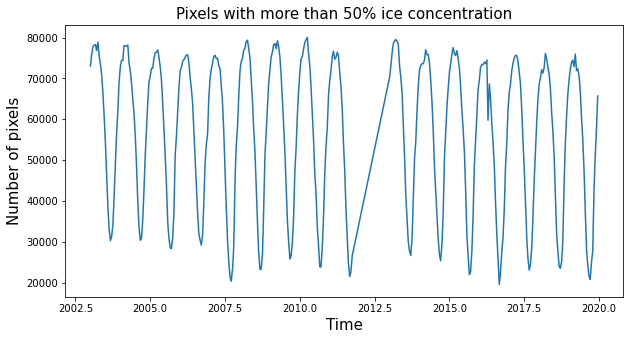

In [6]:
%matplotlib inline
fig , ax1 = plt.subplots(figsize=(10,5))
ax1.plot(times , pixels)
plt.title('Pixels with more than 50% ice concentration', fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Number of pixels', fontsize = 15)
plt.show()

### The area of pixels with more than 99% of ice concentration over time:


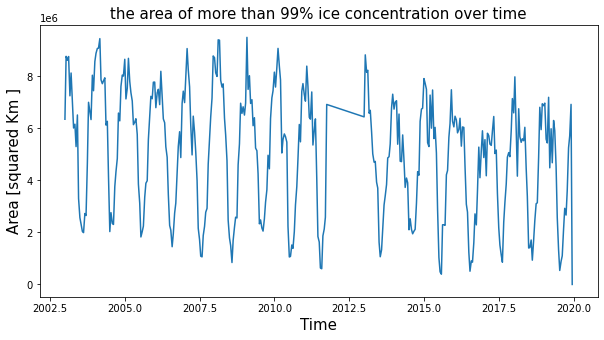

In [7]:
%matplotlib inline
fig , ax1 = plt.subplots(figsize=(10,5))
ax1.plot(times , areas_99[1:])
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Area [squared Km ]', fontsize = 15)
plt.title('the area of more than 99% ice concentration over time', fontsize = 15)
plt.show()

### Plot of the area of pixels with 100% of ice concentration as a function of time:


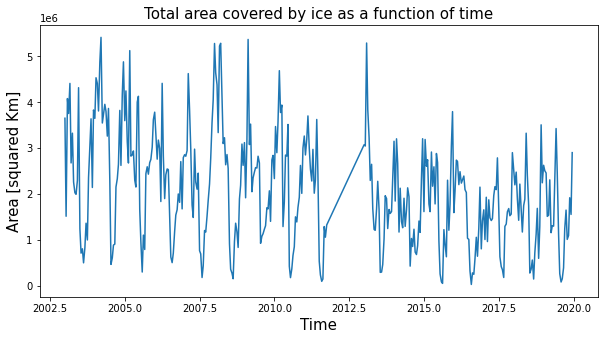

In [8]:
%matplotlib inline
fig , ax1 = plt.subplots(figsize=(10,5))
ax1.plot(times , areas_100)
plt.title('Total area covered by ice as a function of time' , fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Area [squared Km]', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()
# print(np.argmax(areas_100))
# print(np.argmin(areas_100))

#### So how does the minimum value within each year change over time?

#### Answer: It is clear from the previous two plots that the minimum of total area covered by ice is decreasing over time. 

#### Note: In the following we only work with the *total area* covered by ice that was computed previously.

<!-- ## Epilogue -->

<!-- The data that we have here cover the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer. -->

#### We now want to find the date at which the area of the region covered with ice is the highest and the date at which it is the smallest, and what is the value of the minimum area?

In [9]:
%matplotlib inline
#The position of the date that corresponds to the lowest area:     
min_ = np.argmin(areas_100)    # --> file 296
# print('The position of the file the date that corresponds to the lowest area:' , min_, "squared kilometer.")

date_at_min = l[np.argmin(areas_100)][17:19] + "/" + l[np.argmin(areas_100)][15:17] + "/" + l[np.argmin(areas_100)][11:15]
date_at_03 = l[14][17:19] + "/" + l[14][15:17] + "/" + l[14][11:15]
# print("The date that corresponds to the highest area of ice concentration is dd/mm/yy:", 
      
      # l[np.argmax(areas_100)][17:19] + "/" + l[np.argmax(areas_100)][15:17] + "/" + l[np.argmax(areas_100)][11:15])
print("The date that corresponds to the lowest area of ice concentration is dd/mm/yy:", 
      date_at_min)

print('The value of the lowest total area of ice concentration in',date_at_min,  'is' , round(areas_100[min_],2), "squared kilometers.")
#The value of the lowest total area is 28591.097522735596

print('The value of the total area of ice concentration in',date_at_03, 'is' , round(areas_100[14], 1), "squared kilometers.")


print('The precentage of reduction of total area of ice concentration from Aug. 2003 to Aug. 2016 is',
      round((int(areas_100[14]) - int(areas_100[min_]) )/ int(areas_100[14]) , 4) * 100,"%")

The date that corresponds to the lowest area of ice concentration is dd/mm/yy: 01/08/2016
The value of the lowest total area of ice concentration in 01/08/2016 is 28591.1 squared kilometers.
The value of the total area of ice concentration in 01/08/2003 is 805682.1 squared kilometers.
The precentage of reduction of total area of ice concentration from Aug. 2003 to Aug. 2016 is 96.45 %


#### Next, we read in the map for this minimum, and the map for the same day and month but from 2003. We make a plot showing the two ice-concentrations.

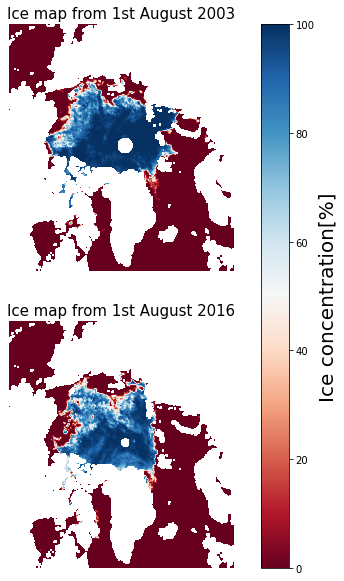

In [10]:
# reading the  file corresponding to smallest area covered by ice
new_fig = np.load('./ice_data/20160801.npy')
#reading the file of the same date from the year 2003: 
old_fig = np.load('./ice_data/20030801.npy')

#Plotting both maps using RdBu colormap, I like this one.
fig, axs = plt.subplots(2 , figsize=(10,10))
axs[0].set_title('Ice map from 1st August 2003', fontsize = 15)
axs[1].set_title('Ice map from 1st August 2016', fontsize = 15)
axs[0].imshow(old_fig , origin = 'lower' , cmap="RdBu")
axs[1].imshow(new_fig ,origin = 'lower' , cmap="RdBu")
axs[1].axis('off'),
axs[0].axis('off')
pos = ax1.imshow(old_fig , cmap=plt.cm.RdBu)
cbar = fig.colorbar(pos,ax = axs)
cbar.set_label("Ice concentration[%]", fontsize = 20)
plt.show()

### One can clearly see that there is a loss of the area covered by ice in August 2016 compared to August 2003. 

#### Now we compute and plot the difference between the two maps so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value. Note that the red color indicates a loss of ice, while blue indicates a gain of ice.


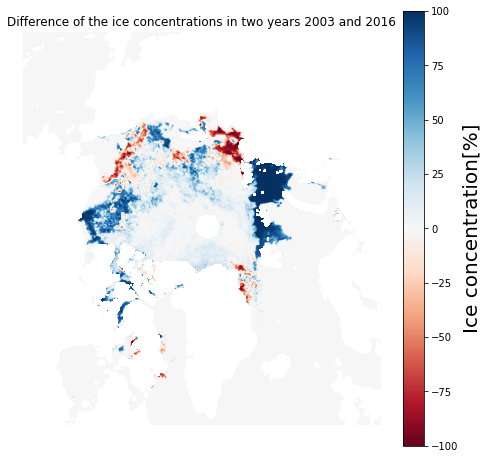

In [11]:
difference = old_fig - new_fig
fig , ax1 = plt.subplots(figsize=(8,8))
pos = ax1.imshow(difference ,origin='lower', cmap = "RdBu")
cbar = fig.colorbar(pos,ax = ax1)
cbar.set_label("Ice concentration[%]", fontsize = 20)
ax1.axis('off')
ax1.set_title('Difference of the ice concentrations in two years 2003 and 2016', fontsize = 12)
plt.show()
# """ The red color indicates a loss in ice, Blue indicates a gain in ice """

#### Finally, we plot the `mean` of ice concentrations of the years 2004-2006 over the months January to December and compare it to the mean over the years 2017-2019. We then should be able to answer the question: what was the loss of the ice over the past 15 years at the minimum values?


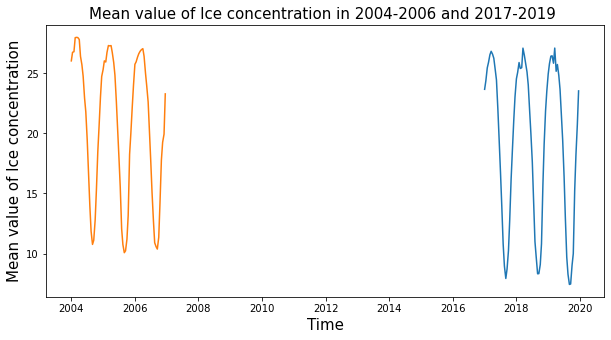

In [12]:

#importing the files of the corresponding years: 

four = glob.glob("./ice_data/*2004*.npy")
five = glob.glob("./ice_data/*2005*.npy")
six = glob.glob("./ice_data/*2006*.npy")
sevent = glob.glob("./ice_data/*2017*.npy")
eightt = glob.glob("./ice_data/*2018*.npy")
ninet = glob.glob("./ice_data/*2019*.npy")

past_list = four + five + six
recent_list = sevent + eightt + ninet

j = 0
i = 0

old_times = np.zeros(72)
new_times = np.zeros(72)
mean_ice_old = np.zeros(72)
mean_ice_recent = np.zeros(72)


#looping over years between 2004-2006
for file in past_list: 
    data_old = np.load(past_list[j])
    year = int(file[11:15]) 
    month = int(file[15:17])
    day = int(file[17:19])  
    old_times[j]=year + (month-1)/12 + (day-1)/360
    data_old[np.isnan(data_old)]=0
    mean_ice_old[j] = np.mean(data_old)
    j = j + 1
    
# looping over years between 2017-2019   
for file in recent_list: 
    data_new = np.load(recent_list[i])
    year = int(file[11:15]) 
    month = int(file[15:17])
    day = int(file[17:19])  
    new_times[i]=year + (month-1)/12 + (day-1)/360
    data_new[np.isnan(data_new)]=0
    mean_ice_recent[i] = np.mean(data_new)
    i = i + 1

#Plotting the mean values of ice concentration over the past and recent years: 
fig , axs = plt.subplots(figsize=(10,5))
axs.plot(new_times, mean_ice_recent)  
axs.plot(old_times , mean_ice_old)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Mean value of Ice concentration', fontsize = 15)
plt.title("Mean value of Ice concentration in 2004-2006 and 2017-2019 ", fontsize = 15)
plt.show()

# Computing the difference in the mean value of ice concentrations between 2004-2006 and 2017-2019:

### One can see that the blue line that presents the mean value of ice concentration from 2017-2019 is shifted downwards. 

The loss of the ice over the past 15 years at the minimum values is given by the following : 

In [13]:
min_old = mean_ice_old[np.where(min)]
min_recent = mean_ice_recent[np.where(min)]
difference_mean_min = min_old - min_recent
print('The reduction of mean of minimum value ice concentration from 2004-2006 to 2017-2019 is :' , difference_mean_min)    

The reduction of mean of minimum value ice concentration from 2004-2006 to 2017-2019 is : [2.36967659]


## Conclusion
#### Based on the analysis of satellite images, there is evidence of a decrease in ice concentration in the Arctic Ocean in recent years. A comparison between satellite images from August 2003 and August 2016 indicates a 96.45% reduction in the total area covered by ice. Furthermore, a comparison of satellite images from 2004-2006 and 2017-2019 shows a reduction in the mean value of minimum ice concentration by 2.23. 


